In [56]:
!pip install xgboost

In [57]:
# util library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# preprocessors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score


from imblearn.over_sampling import SMOTE



from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('Training Data.csv')
df.shape

(252000, 13)

In [4]:
df.drop('Id',axis = 1,inplace=True)

In [5]:
df.duplicated(keep=False).value_counts()

True     215993
False     36007
dtype: int64

In [6]:
df = df.drop_duplicates()
df = df.groupby(df.index).first()

In [7]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [10]:
print(*df.columns, sep='\n')

Income
Age
Experience
Married/Single
House_Ownership
Car_Ownership
Profession
CITY
STATE
CURRENT_JOB_YRS
CURRENT_HOUSE_YRS
Risk_Flag


INCOME

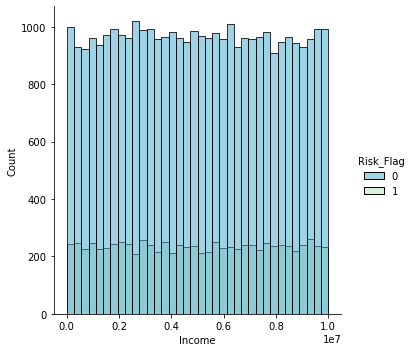

In [13]:
sns.displot(x='Income',hue='Risk_Flag',palette='GnBu_r',data=df)

AGE

[]

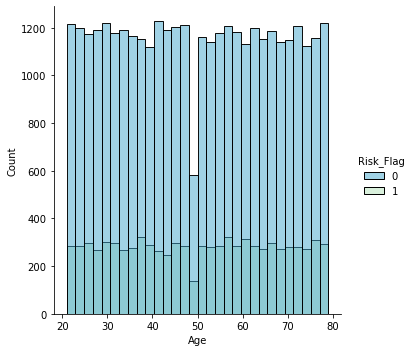

In [14]:
sns.displot(df, x="Age",palette='GnBu_r', hue="Risk_Flag",bins=30)
plt.plot()

Experience

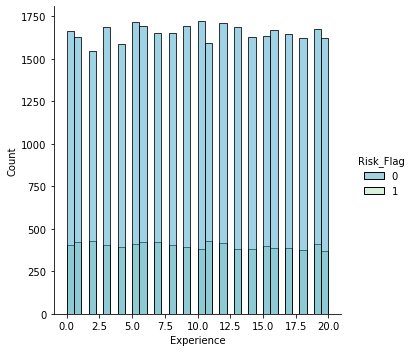

In [15]:
sns.displot(df, x="Experience",palette='GnBu_r', hue="Risk_Flag")

Married or not

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

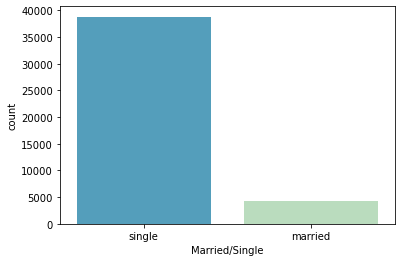

In [16]:
sns.countplot(x='Married/Single',palette='GnBu_r',data=df)

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

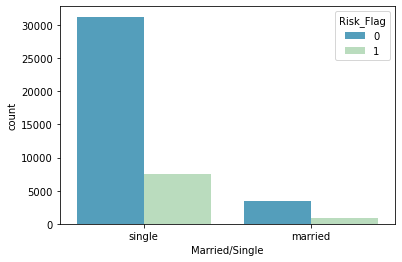

In [17]:
sns.countplot(x='Married/Single',palette='GnBu_r',hue='Risk_Flag',data=df)

House Ownership

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

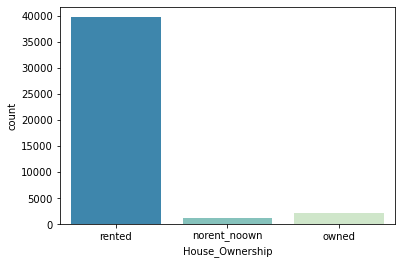

In [18]:
sns.countplot(x='House_Ownership',palette='GnBu_r',data=df)

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

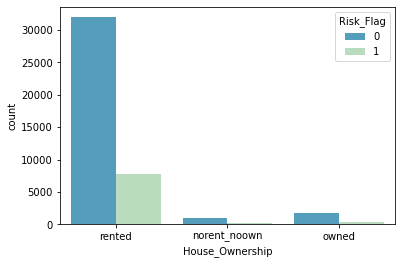

In [19]:
sns.countplot(x='House_Ownership',palette='GnBu_r',hue='Risk_Flag',data=df)

Car OwnerShip

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

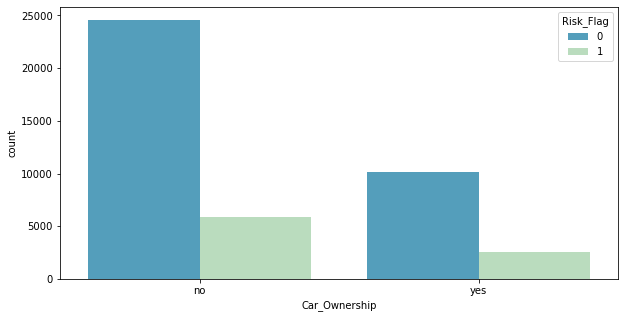

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Car_Ownership',palette='GnBu_r',hue='Risk_Flag',data=df)

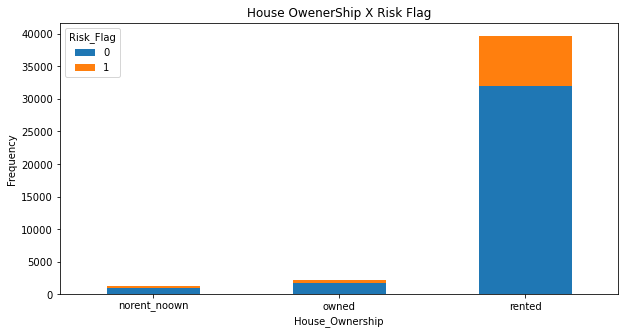

In [20]:
pd.crosstab(df.House_Ownership,df.Risk_Flag).plot(kind="bar", stacked=True, figsize=(10,5))
plt.title('House OwenerShip X Risk Flag')
plt.xlabel('House_Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Profession

<AxesSubplot:xlabel='count', ylabel='Profession'>

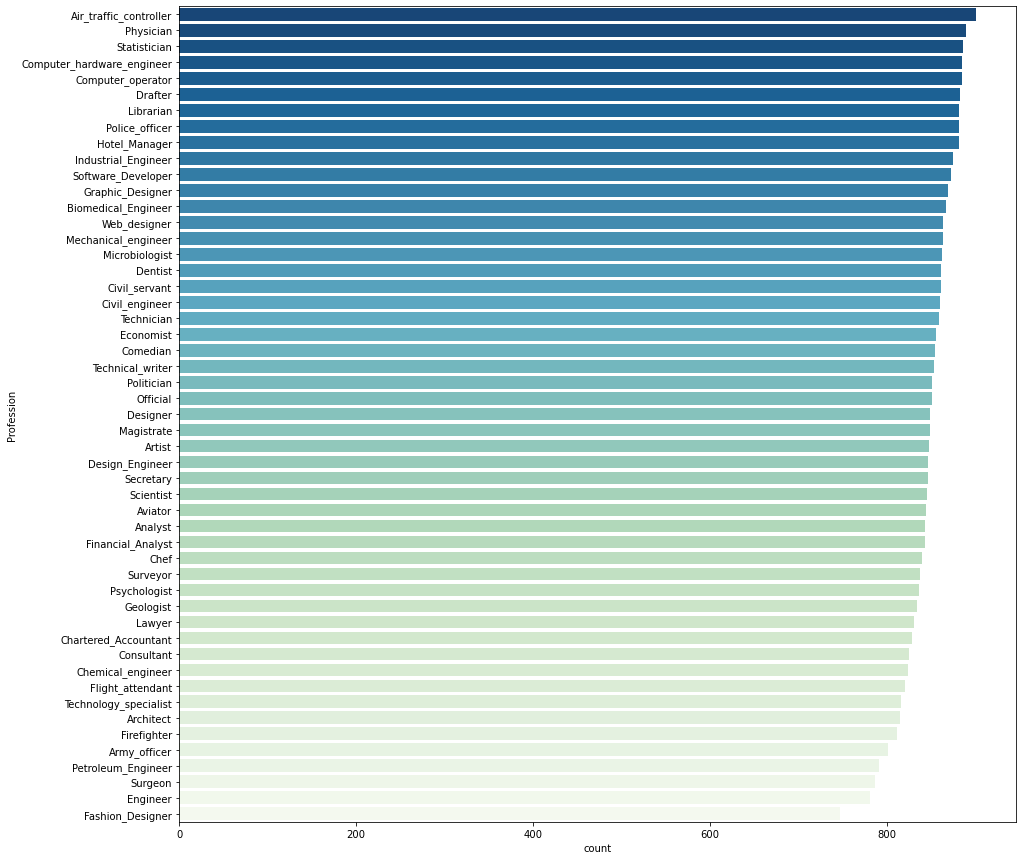

In [22]:
plt.figure(figsize=(15,15))

sns.countplot(y=df['Profession'],order=df['Profession'].value_counts().index,palette='GnBu_r')

STATE

<AxesSubplot:xlabel='count', ylabel='STATE'>

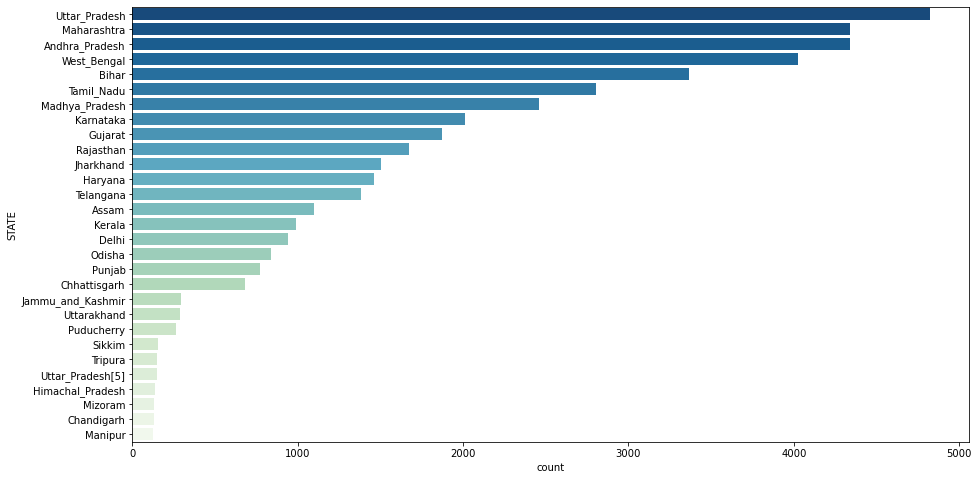

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(y=df['STATE'],order=df['STATE'].value_counts().index,palette='GnBu_r')

CURRENT JOB YEARS

<AxesSubplot:xlabel='count', ylabel='CURRENT_JOB_YRS'>

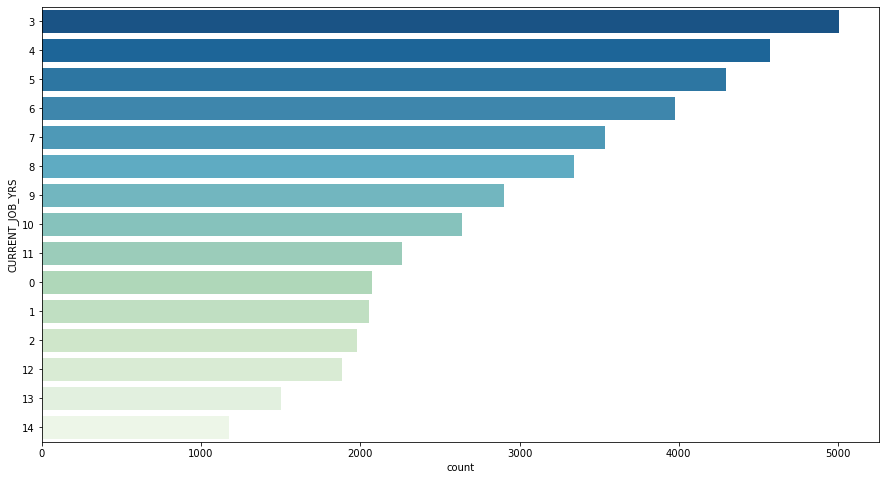

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(y=df['CURRENT_JOB_YRS'],order=df['CURRENT_JOB_YRS'].value_counts().index,palette='GnBu_r')

HOUSE YEARS

<AxesSubplot:xlabel='count', ylabel='CURRENT_HOUSE_YRS'>

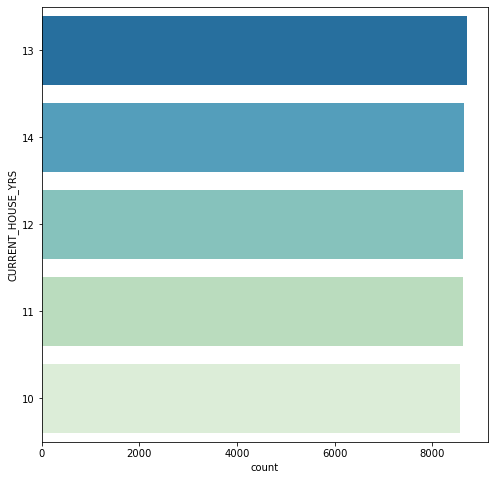

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['CURRENT_HOUSE_YRS'],order=df['CURRENT_HOUSE_YRS'].value_counts().index,palette='GnBu_r')

RISK FLAG

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

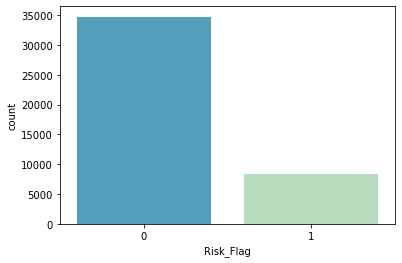

In [26]:
sns.countplot(x=df['Risk_Flag'],palette='GnBu_r')

Observing the correlations

<AxesSubplot:>

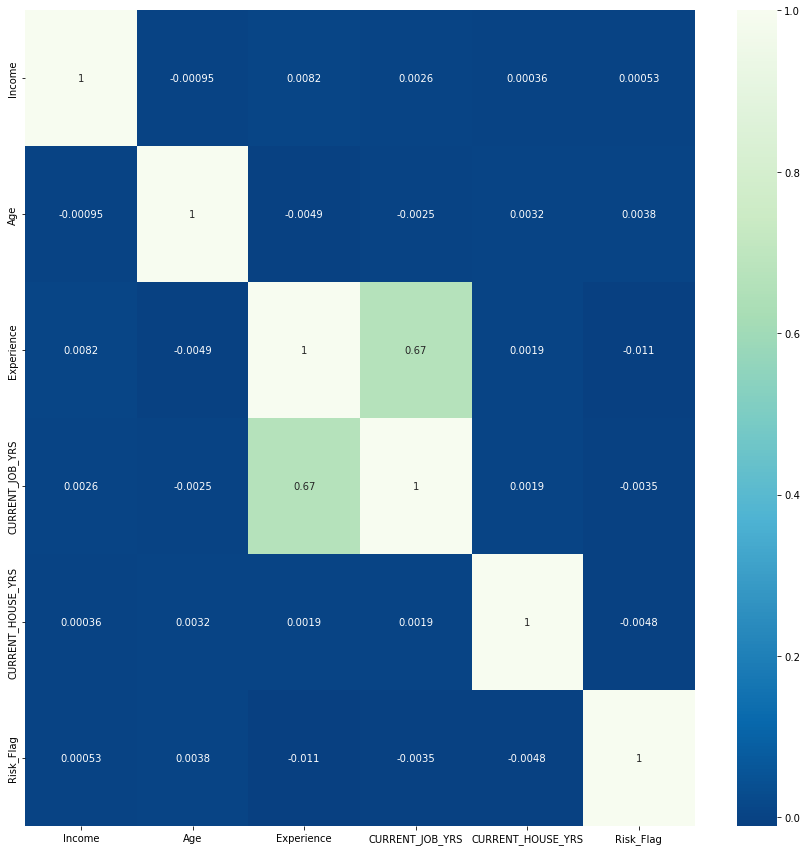

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap="GnBu_r")

Data Cleaning

In [28]:
exclude = ['Risk_Flag','STATE','CITY','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS']
numeric = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
categorical = ['Profession']
dummies = ['Married/Single', 'House_Ownership', 'Car_Ownership']

In [29]:
pf = pd.get_dummies(df,columns=dummies)

In [30]:
for c in categorical:
    print(c,df[c].value_counts().shape)

Profession (51,)


In [31]:
for n in numeric:
    print(n,df[n].value_counts().shape)

Income (41920,)
Age (59,)
Experience (21,)
CURRENT_JOB_YRS (15,)
CURRENT_HOUSE_YRS (5,)


In [32]:
for col in categorical:
    pf[col] = LabelEncoder().fit_transform(pf[col])

Feature Exclusion

In [33]:
X = pf.drop(exclude, axis=1)
y = pf["Risk_Flag"]

StandardScaling

In [34]:
sc = StandardScaler()
X = sc.fit_transform(X)

Min_Max Scaling

In [38]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

OVERSAMPLING

In [39]:
print('X.shape: ',X.shape,'\ny.shape: ',y.shape)
print('Rick Flag\n',y.value_counts())

X.shape:  (43190, 11) 
y.shape:  (43190,)
Rick Flag
 0    34747
1     8443
Name: Risk_Flag, dtype: int64


Using SMOTE

In [40]:
X, y = SMOTE().fit_resample(X, y)

In [41]:
print('X.shape: ',X.shape,'\ny.shape: ',y.shape)
print('Rick Flag\n',y.value_counts())

X.shape:  (69494, 11) 
y.shape:  (69494,)
Rick Flag
 0    34747
1    34747
Name: Risk_Flag, dtype: int64


Splitting the data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = np.random.randint(100))

In [49]:
### utility function for testing testcases
def tester(x,y,model):
    
    # testing
    y_pred = model.predict(x)
    
    # printing model names
    
    print(f'{repr(model)}')
    
    # classification report
    c_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    sns.set(font_scale=1.8)
    plt.figure(figsize=(20,12))
    plt.title("Classification Report", fontsize=50);
    plt.tick_params(labelbottom=False, labeltop=True)
    sns.heatmap(c_report,
                annot=True,
                fmt='g',
                cbar=False,
                cmap="GnBu_r",
                yticklabels = ["0","1",'accuracy','macro-avg','weighted-avg'],
                annot_kws={ 'fontsize': 16}
               )
    
    # other metrix
    print(f'accuracy_score: {accuracy_score(y,y_pred)*100:.2f}')

    print(f'precision_score: {precision_score(y,y_pred)*100:.2f}')
    print(f'recall_score: {recall_score(y,y_pred)*100:.2f}')
    print(f'f1-score: {f1_score(y,y_pred)*100:.2f}')

    fpr, tpr, _= roc_curve(y,y_pred)
    print(f'auc: {auc(fpr,tpr)*100:.2f}')
    print(f'roc_auc_score: {roc_auc_score(y,y_pred)*100:.2f}')
    
    
    
    sns.set(font_scale=2.5)
    plt.figure(figsize=(20,5))
    plt.title("Matrix", fontsize=50);
    sns.heatmap(confusion_matrix(y, y_pred),
                annot=True,
                fmt='g',
                xticklabels = ["Safe","Risky"],
                yticklabels = ["Safe","Risky"],
                cmap="Greens",
                cbar=False,
                annot_kws={ 'fontsize': 32}
               )

LogisticRegression(random_state=49)
accuracy_score: 49.85
precision_score: 49.63
recall_score: 48.94
f1-score: 49.28
auc: 49.85
roc_auc_score: 49.85


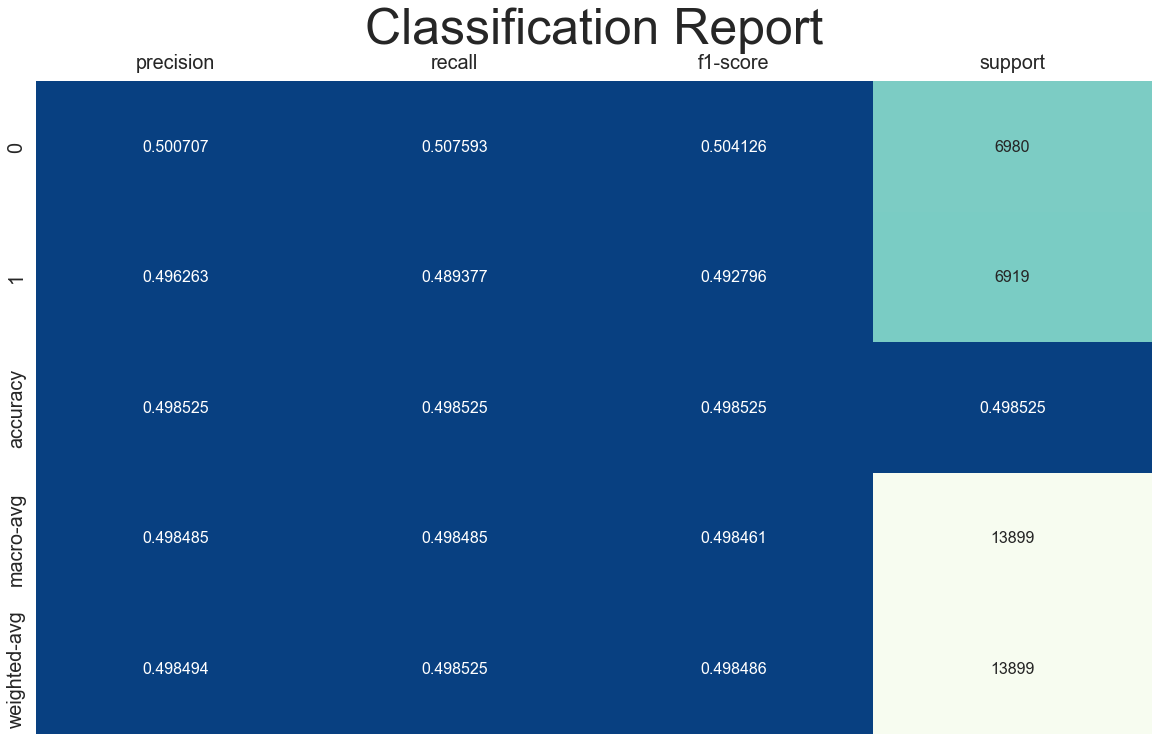

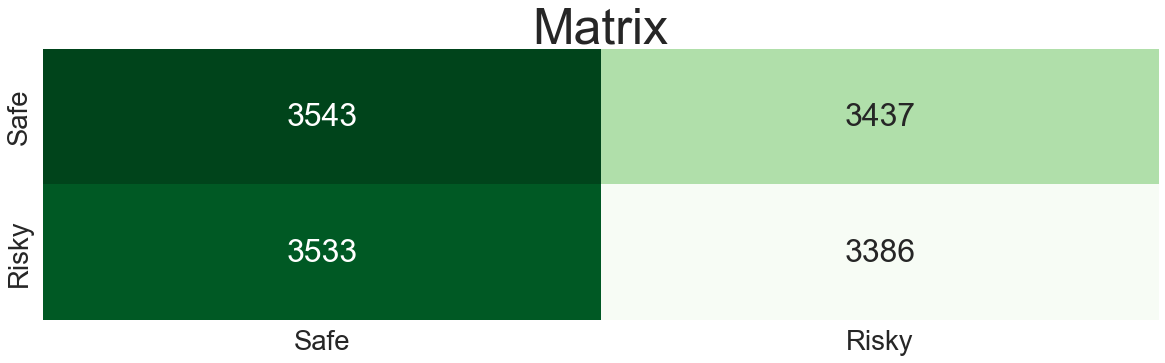

In [50]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=np.random.randint(100))
LR_clf.fit(X_train, y_train)
tester(X_test,y_test,LR_clf)

2 - Naive Bayes | Gaussian

GaussianNB()
accuracy_score: 50.65
precision_score: 50.62
recall_score: 35.51
f1-score: 41.74
auc: 50.58
roc_auc_score: 50.58


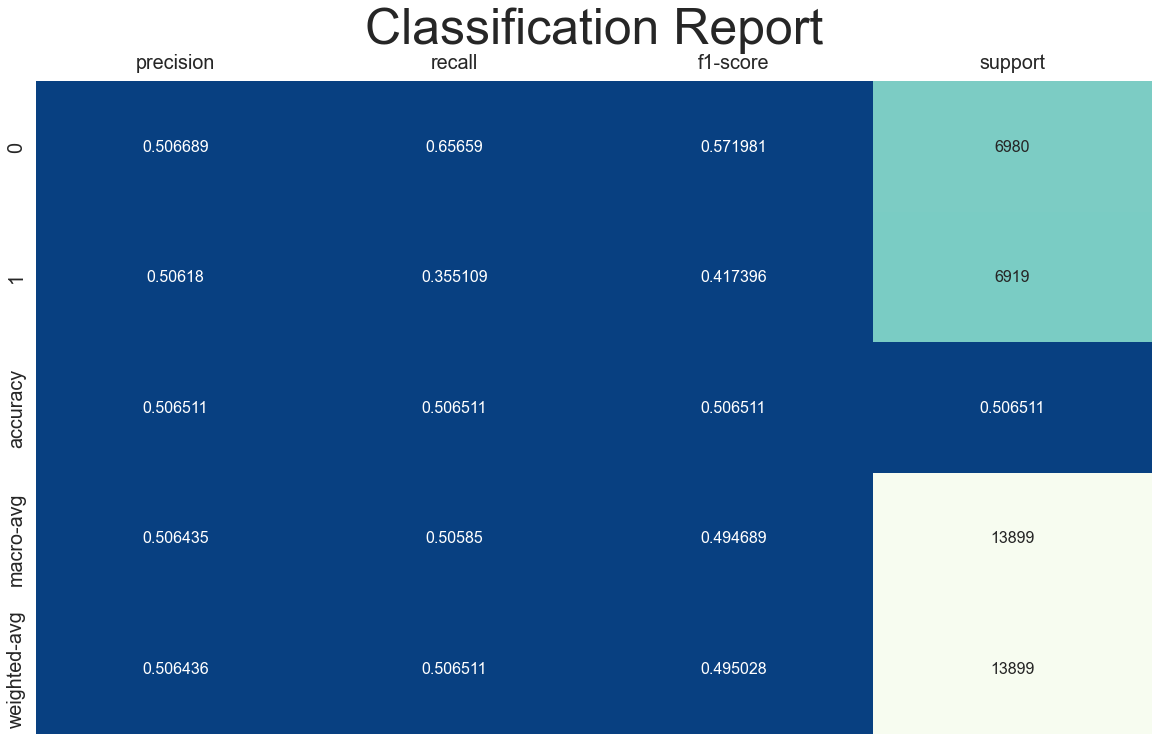

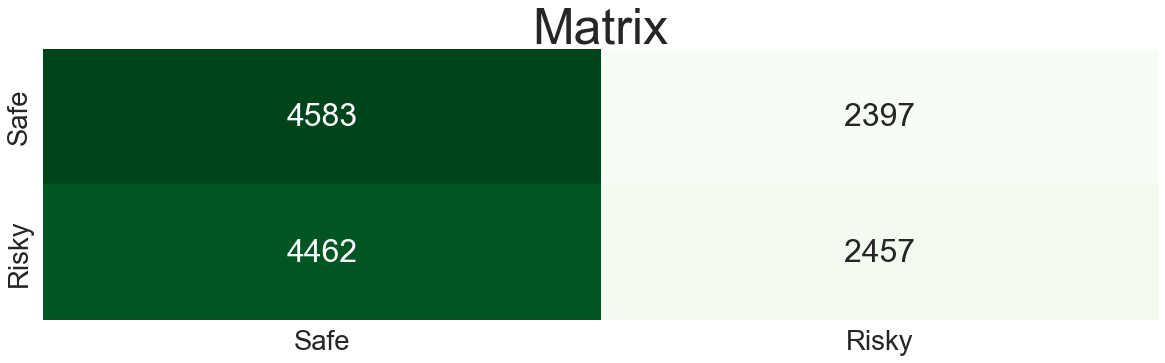

In [52]:
from sklearn.naive_bayes import GaussianNB
GNB_clr = GaussianNB()
GNB_clr.fit(X_train, y_train)
tester(X_test,y_test,GNB_clr)

SVM

C:\Users\sdey2\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=1000)
accuracy_score: 50.47
precision_score: 50.26
recall_score: 49.57
f1-score: 49.91
auc: 50.47
roc_auc_score: 50.47


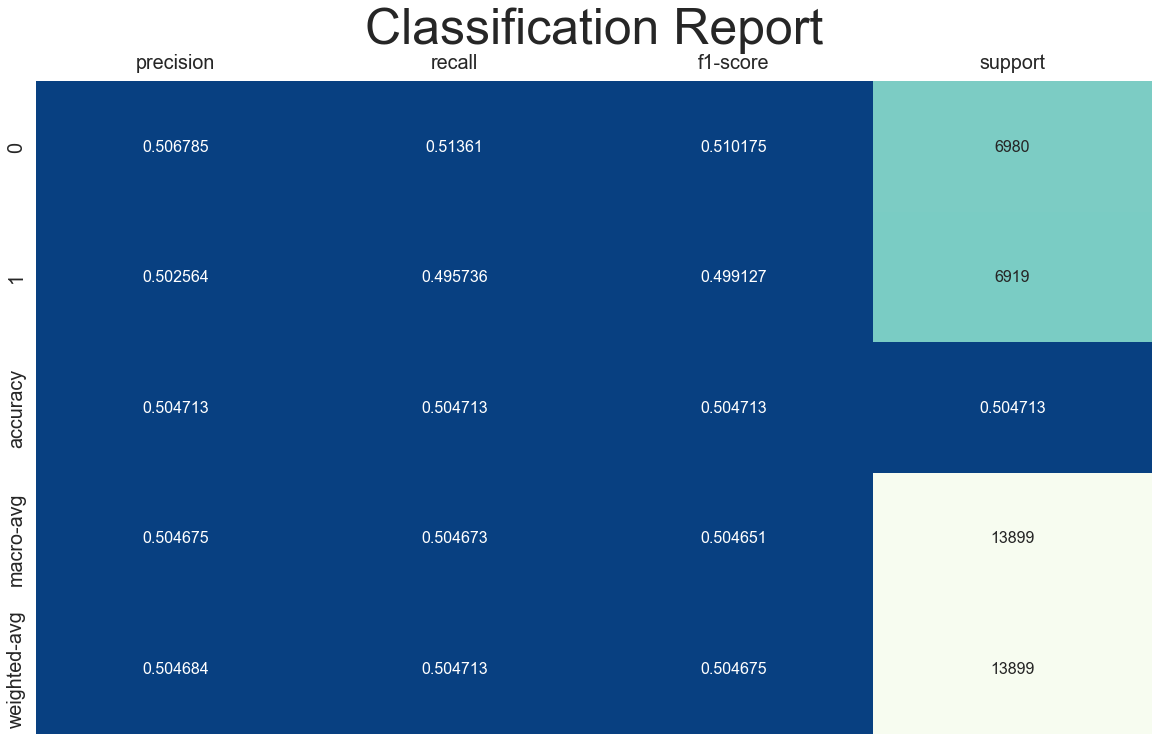

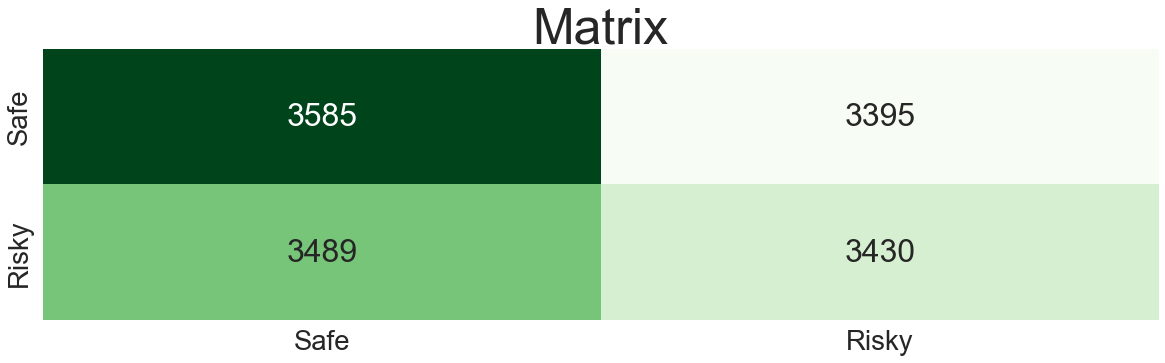

In [58]:
svc_clf = SVC(kernel='linear', max_iter=1000)
svc_clf.fit(X_train,y_train)
tester(X_test,y_test,svc_clf)

DECISION TREE

DecisionTreeClassifier(max_leaf_nodes=50)
accuracy_score: 76.89
precision_score: 100.00
recall_score: 53.58
f1-score: 69.77
auc: 76.79
roc_auc_score: 76.79


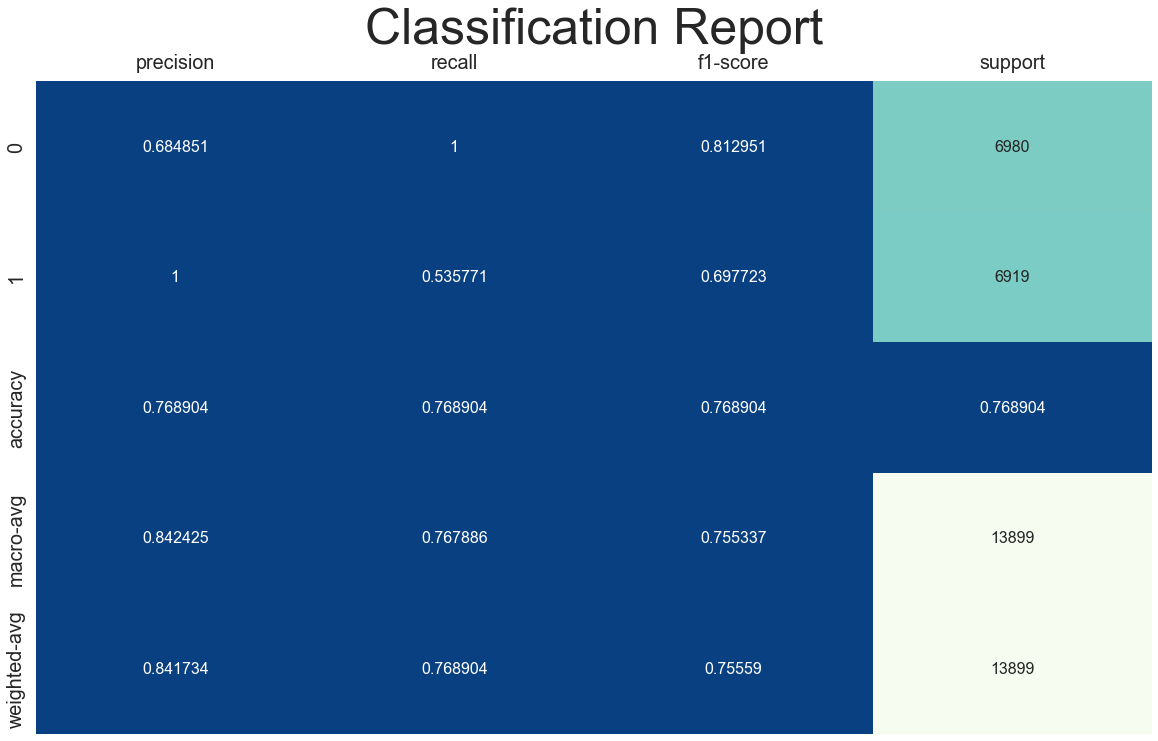

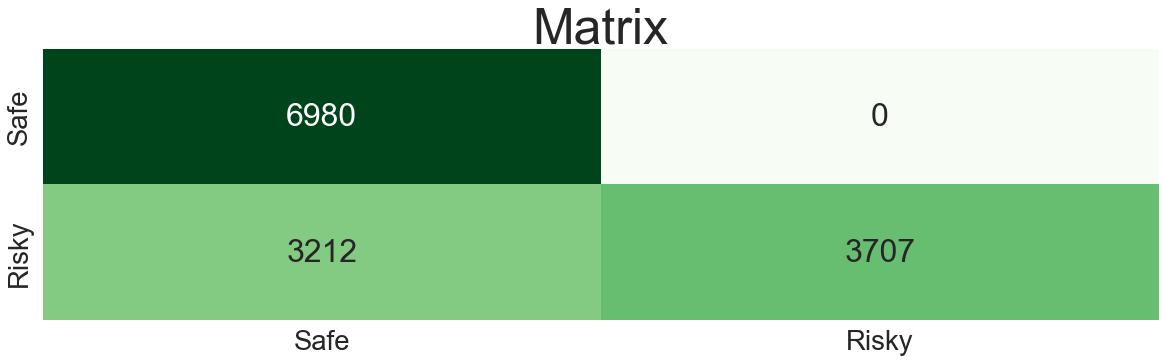

In [59]:
DT_clf = DecisionTreeClassifier(max_leaf_nodes=50)
DT_clf.fit(X_train,y_train)
tester(X_test,y_test,DT_clf)

K-NEAREST NEIGHBOUR

KNeighborsClassifier(n_neighbors=1)
accuracy_score: 77.74
precision_score: 72.82
recall_score: 88.21
f1-score: 79.78
auc: 77.79
roc_auc_score: 77.79


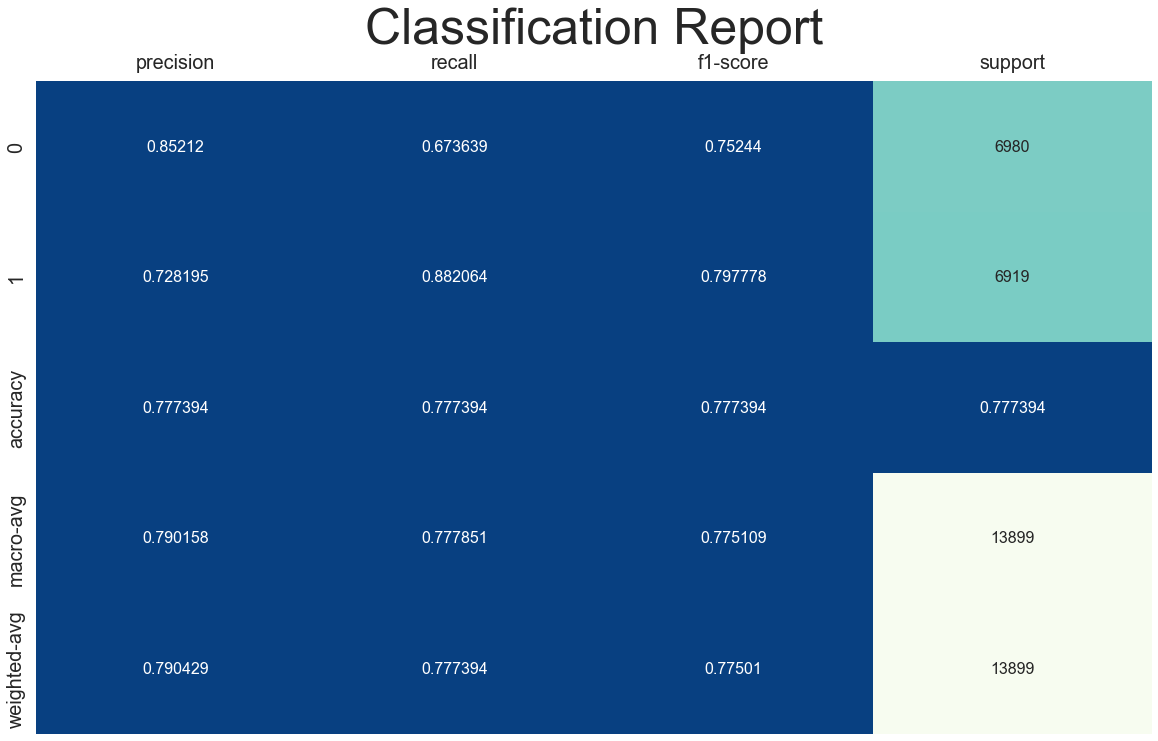

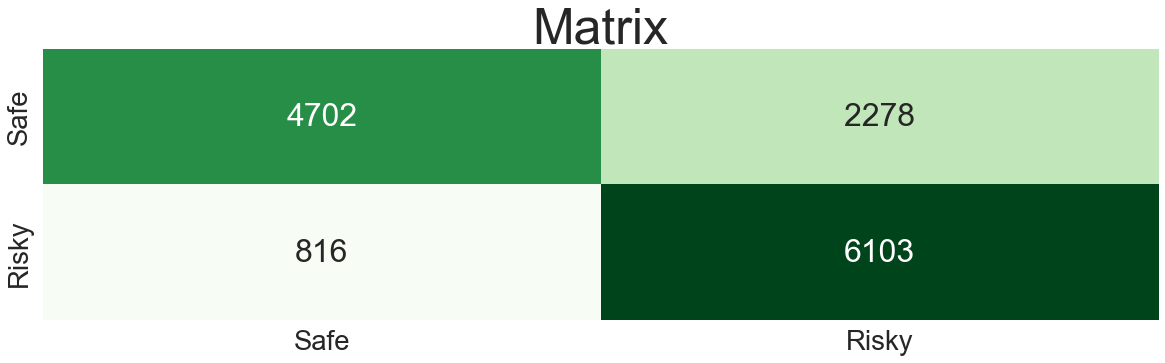

In [60]:
KN_clf = KNeighborsClassifier(n_neighbors=1)
KN_clf.fit(X_train,y_train)
tester(X_test,y_test,KN_clf)

Random Forest

RandomForestClassifier(max_leaf_nodes=1000, n_estimators=1000, random_state=1)
accuracy_score: 80.88
precision_score: 86.20
recall_score: 73.33
f1-score: 79.25
auc: 80.85
roc_auc_score: 80.85


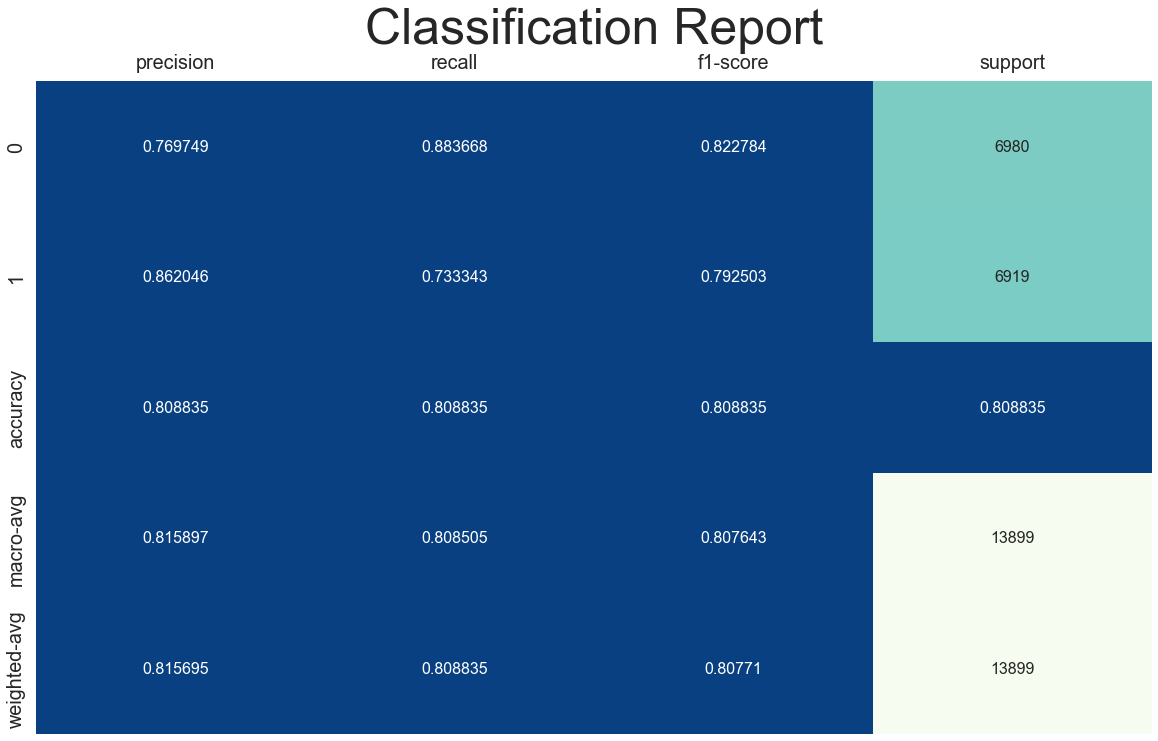

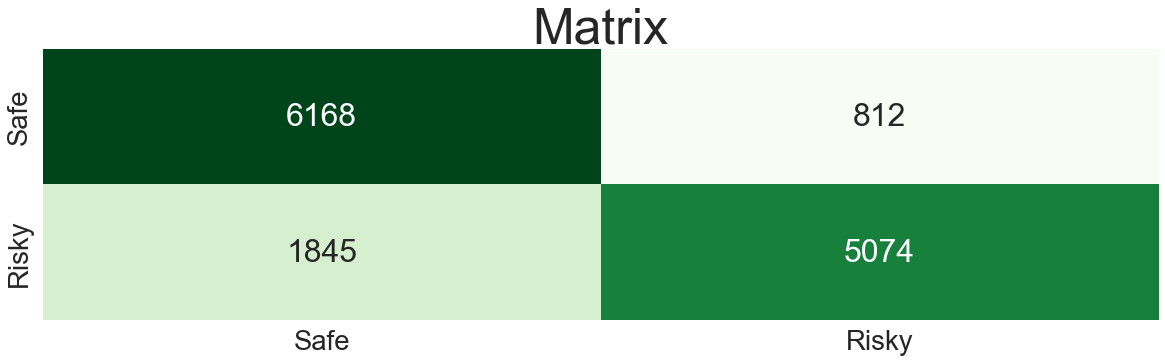

In [61]:
RF_clf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=1000)
RF_clf.fit(X_train,y_train)
tester(X_test,y_test,RF_clf)

 Gradient Boosting

GradientBoostingClassifier(max_depth=8, max_leaf_nodes=100, n_estimators=400,
                           subsample=0.5)
accuracy_score: 87.17
precision_score: 96.56
recall_score: 76.98
f1-score: 85.66
auc: 87.13
roc_auc_score: 87.13


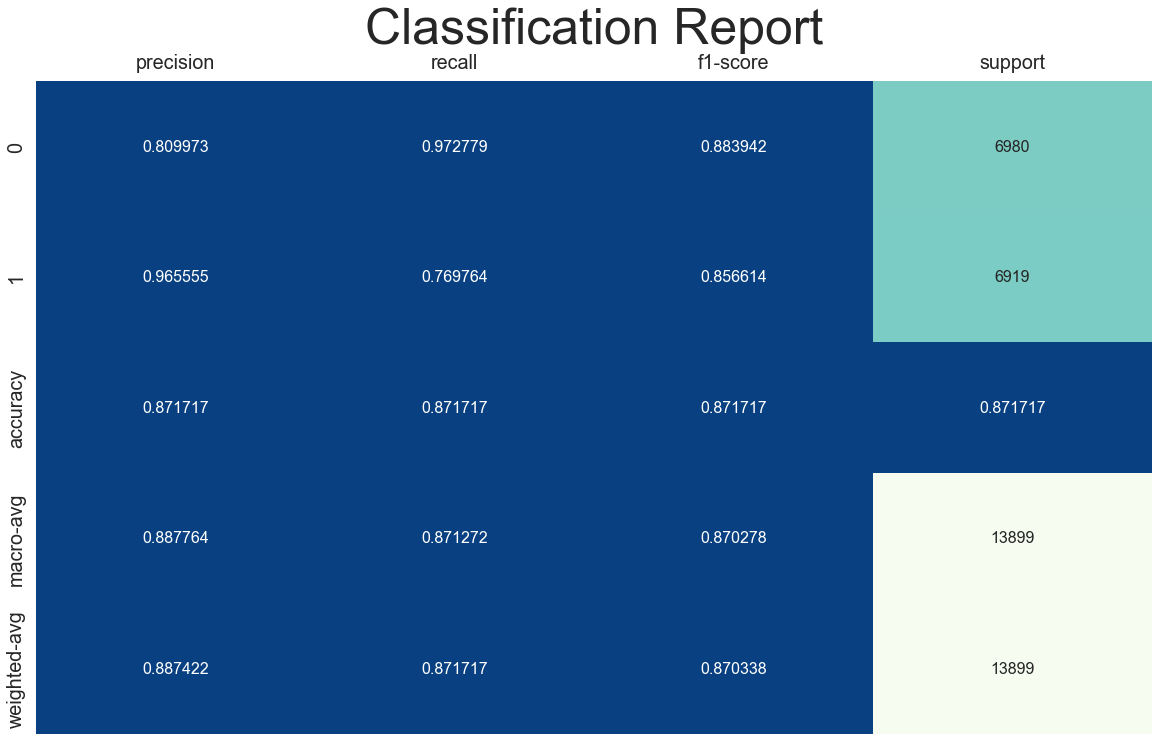

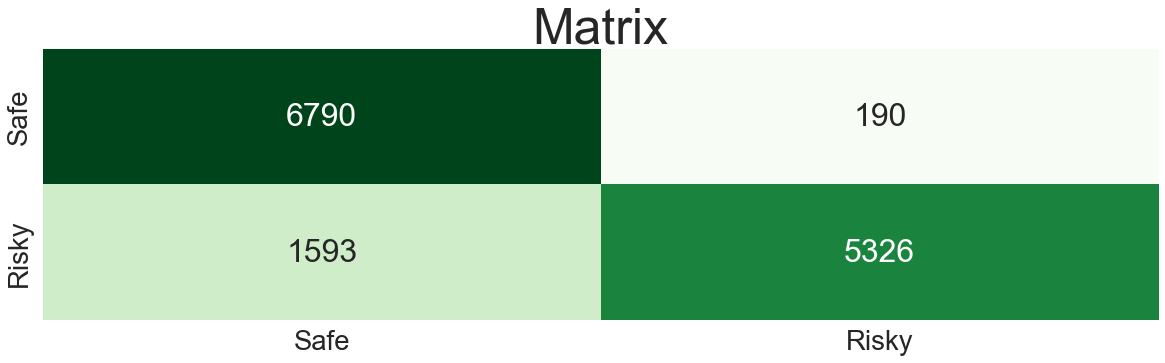

In [62]:
GB_clf = GradientBoostingClassifier(subsample=0.5,
                                    n_estimators=400,
                                    max_depth=8,
                                    max_leaf_nodes=100)
GB_clf.fit(X_train,y_train)
tester(X_test,y_test,GB_clf)